Yusra Fayyaz - 106319100

# 0.) Import and Clean data

In [171]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [174]:
#drive.mount('/content/gdrive/', force_remount = True)

In [175]:
df = pd.read_excel("bank-additional-full.xlsx")

In [176]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [177]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [178]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [179]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

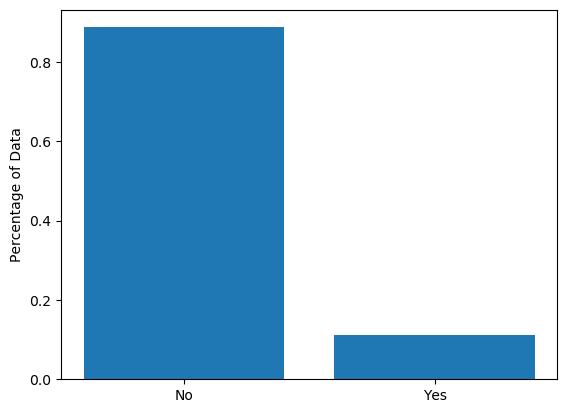

In [180]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [181]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [182]:
from imblearn.over_sampling import SMOTE

In [183]:
###############
###TRANSFORM###
###############
smote = SMOTE()
X_scaled, y_train = smote.fit_resample(X_scaled, y_train)

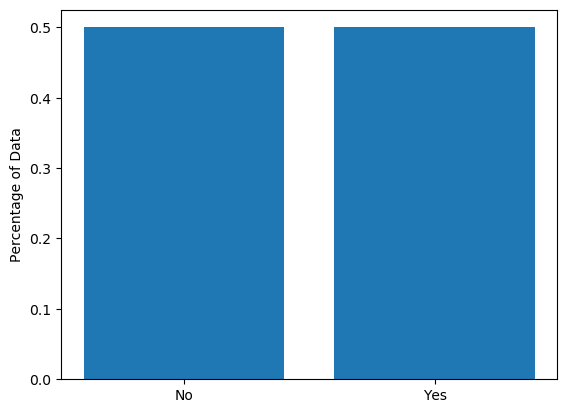

In [184]:
obs = len(y_train)
plt.bar(["No","Yes"],[len(y_train[y_train.yes==0])/obs,len(y_train[y_train.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [185]:
dtree1 = DecisionTreeClassifier(max_depth = 3)
dtree1.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.211\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.503\ngini = 0.275\nsamples = 18694\nvalue = [15621, 3073]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.101\nsamples = 10221\nvalue = [9675, 546]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.084\nsamples = 10029\nvalue = [9587, 442]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.497\nsamples = 192\nvalue = [88, 104]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.319\ngini = 0.419\nsamples = 8473\nvalue = [5946, 2527]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.479\nsamples = 6100\nvalue = [3679, 2421]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.085\nsamples = 2373\nvalue = [2267, 106]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.425\nsamples = 32466\nvalue = [9959, 22507]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.719\ngini = 0.346\nsamples = 26658\nvalue = [5929, 20729]\nclass

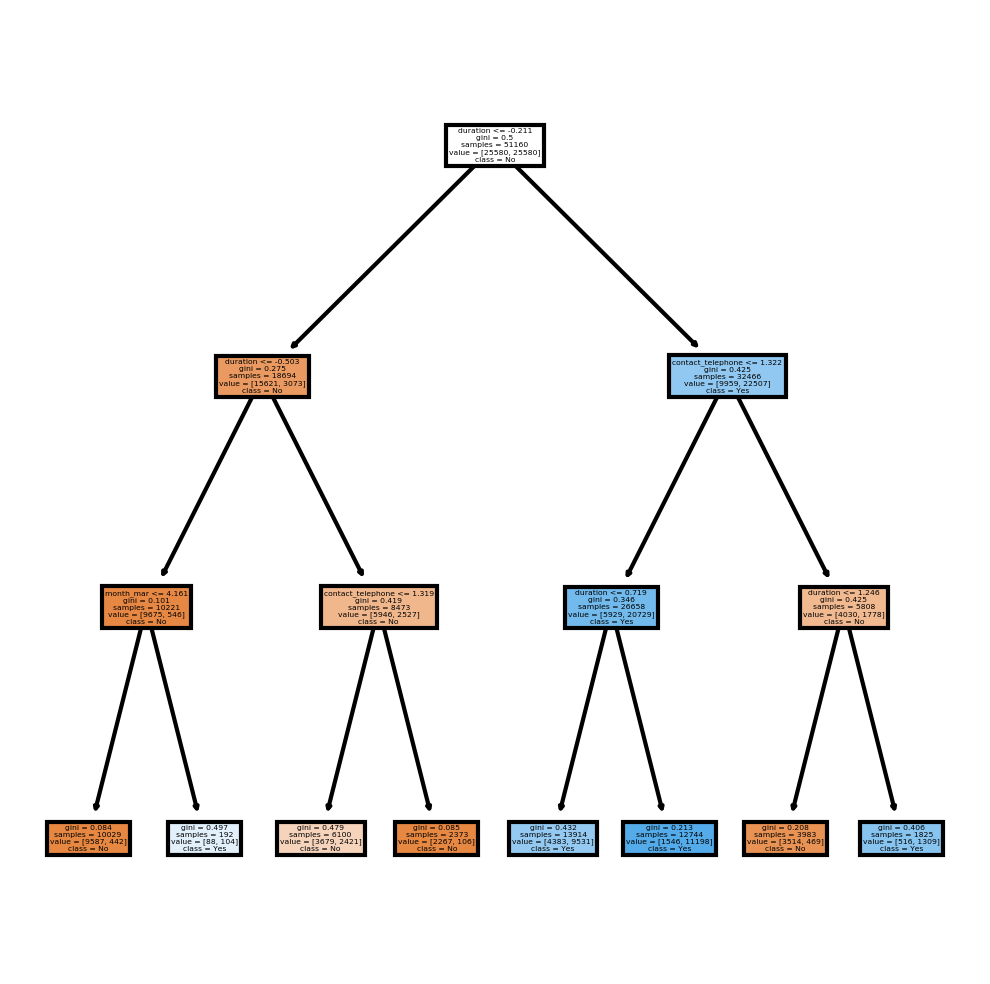

In [186]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree1, filled = True, feature_names = X.columns, class_names=["No","Yes"])
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [187]:
y_pred = dtree1.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

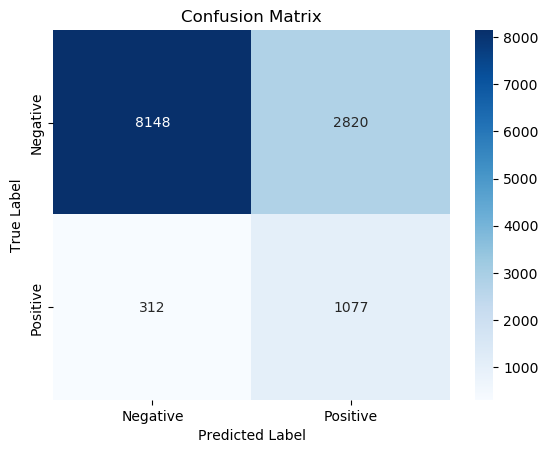

In [188]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [189]:
dtree = DecisionTreeClassifier(max_depth = 3)

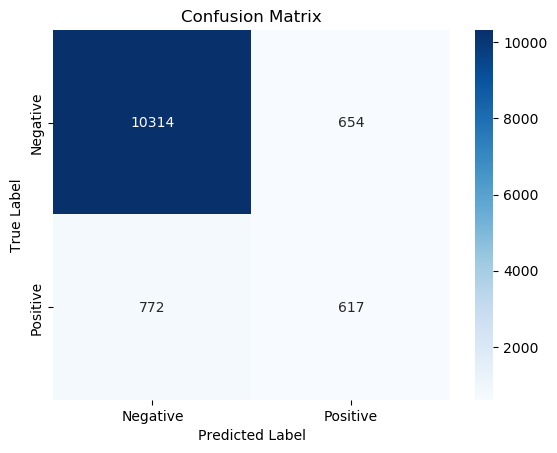

In [190]:
bagging = BaggingClassifier(estimator = dtree,
                 n_estimators = 100,
                 max_samples = 0.5,
                 max_features = 1)
bagging.fit(X_scaled, y_train)
y_pred = bagging.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

class_labels = ['Negative', 'Positive'] 

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [191]:
from sklearn.ensemble import AdaBoostClassifier

In [192]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [193]:
boost = AdaBoostClassifier(estimator = dtree,
                 n_estimators = 100)
boost.fit(X_scaled, y_train)
y_pred = boost.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

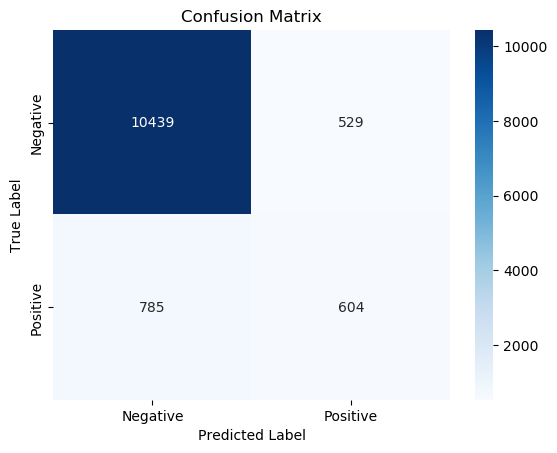

In [194]:
class_labels = ['Negative', 'Positive'] 

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

I will do this two ways - one with SuperLearner and one without!

### With SuperLearner

In [195]:
pip install mlens

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from mlens.ensemble import SuperLearner

In [197]:
knn = KNeighborsClassifier()
knn.fit(X_scaled, y_train)

KNeighborsClassifier()

In [198]:
forest = RandomForestClassifier()
forest.fit(X_scaled, y_train)

RandomForestClassifier()

In [199]:
base_learners = [dtree1, bagging, boost, knn, forest]

In [200]:
super_learner = SuperLearner(folds=10, random_state=42)

In [201]:
super_learner.add(base_learners)

SuperLearner(array_check=None, backend=None, folds=10,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=10, raise_on_e...rer=None)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [202]:
super_learner.fit(X_scaled, y_train)

SuperLearner(array_check=None, backend=None, folds=10,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=10, raise_on_e...rer=None)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [203]:
base_predictions = super_learner.predict(X_scaled)

In [204]:
logreg = LogisticRegression(fit_intercept = False).fit(base_predictions, y_train)

In [205]:
y_pred = logreg.predict(super_learner.predict(X_test))

In [206]:
logreg.coef_

array([[-0.2442523 , -2.99369556, -4.7738777 , -4.23050816, 19.23018152]])

Here, we see that the most important model is the Random Forest classifier, and that the least important is the Boosting model.

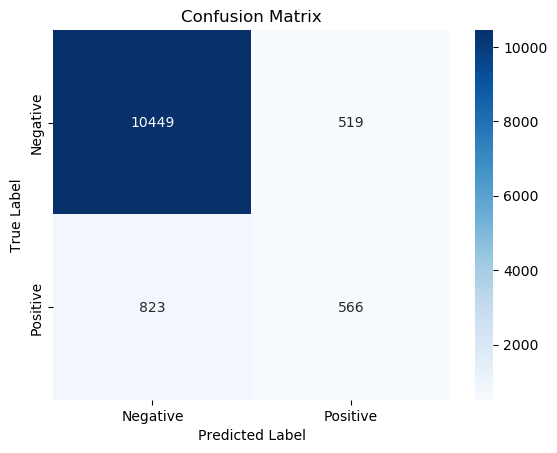

In [207]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

class_labels = ['Negative', 'Positive'] 

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Without SuperLearner (As in class)

In [209]:
base_learners = [list(dtree1.predict(X_scaled).astype(float)),
                    list(bagging.predict(X_scaled).astype(float)),
                    list(boost.predict(X_scaled).astype(float)),
                    list(knn.predict(X_scaled).astype(float)),
                    list(forest.predict(X_scaled).astype(float))]

In [210]:
base_transpose = np.array(base_learners).transpose()

In [211]:
super_learner = LogisticRegression()
super_learner.fit(base_transpose, y_train)
super_learner.coef_

array([[ 0.46439976,  0.5464358 ,  1.65046235,  2.19406092, 12.5365733 ]])

Here, we find again that the Random Forest classifier is the most important, however we see that rather than boosting, the decision tree is the least important.